## Cross Entropy Method

The Cross Entropy Method (CEM) may be described as a Monte Carlo approach to the continuous optimisation of maximising a function. CEM is a sub-set of expectation-maximization algorithms, these are split into two main steps. The expectation step calculates the expected value which is consequently maximised by adjusting parameters.   

Firstly, a distribution is randomly initialised, then parameter vectors are sampled from the distribution, the policy is then executed under these parameter vectors. The cumulative reward and parameters are stored over a number of iterations, so the best can be used to to fit the distribution parameters by maximising the log probability distribution that is determined by the average rewards experienced on the previous step.           



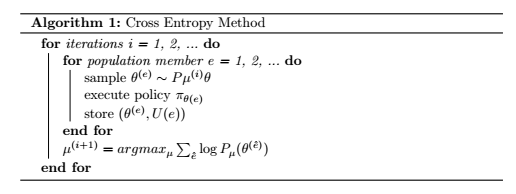

Algorithm above is adapted from [Abbeel, P]. The pseudo-code represents the Cross Entropy Method which can be defined as such:

\begin{equation}
\max_{\theta}\ U(\theta) = \max_{\theta}\ E[\sum_{t=0}^{H} R(s_t \mid \pi_{\theta})]
\end{equation}  

Here, we maximise the expected sum of rewards $U$ under the policy $\theta$, by sampling a distribution of policies $P\mu^{i}(\theta)$, parametrised by $\mu$ at iteration $i$, where $\mu^i$ is the mean of a Gaussian and $\theta$ is sampled from the Guassian [Abbeel, P]. 

When using a Gaussian sampling distribution, the sample can be characterised by a vector $\mu$ of means and a vector $\sigma$ of standard deviations. As the algorithm is iterated, $\mu$ and $\sigma$ are generated such that $\mu$ tends towards the optimal sample and  $\sigma$ tends towards 0. This is known as *'normal updating'* [Benham et al.]. 

### The Fun Part

Below we have provided some set up code and a problem to apply the algorithm to (as how else will you know it works). OpenAI gym's Acrobot has been chosen due to its relative simplicity and applicability for CEM. Again, feel free to change the code including Acrobot. Cartpole or Mountain Car are good alternatives, whereas, Tetris from pixels is incredibly unlikely to achieve any results with this method.

### Free Set-Up Code

Feel free to change paremeters and or code, a lot more than 5 iterations will be needed to demonstrate learning

In [48]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('Acrobot-v1')
state = env.reset()

# set parameters
iterations = 2
samples = 25
elite = 7
iterations_cum_reward = []
# initialise mean and standard deviation
mu = np.random.uniform(size=state.shape)
sigma = np.random.uniform(low=0.001, size=state.shape)

def sample_gaussian(mu, sigma, n, m):
    weights = np.random.normal(loc=mu, scale=sigma, size=(n, m))
    return weights


def evaluate_binary_policy(env, theta, render=False):
    max_steps = 2000
    cum_reward = 0
    state = env.reset()
    for _ in range(max_steps):
        action = int(np.dot(theta, state) > 0)
        state, reward, terminal, info = env.step(action)
        cum_reward += reward
        if render:
            env.render()
        if terminal:
            break
    return cum_reward

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


### In the below cell implement the Cross Entropy Method algorithm: basic steps outlined.

In [49]:
def learn_ce():
    for _ in range(iterations):
        # Obtain n samples from current sampling distribution
            # Evaluate objective function at sampled points
            # Sort X by objective function values and take n elite samples
            # Update the parameters of sampling distribution
        #iterations_cum_reward.append(cum_reward.mean())
    env.close()

### Run the code

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


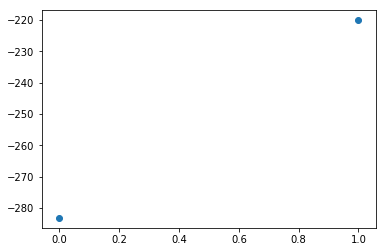

In [50]:
env = gym.make('Acrobot-v1')
state = env.reset()
learn_ce()
plt.scatter(range(iterations), iterations_cum_reward)
plt.show()